## 6.2例題上限のあるカウントデータ
「N個体の実験対象に同じ処理をしたら、y個体で反応が陽性、N-y個体では陰性だった」という構造のデータは二項分布を使って説明できるかもしれない。

個体ごとに異なる体サイズや生育環境に左右されて、種子の生存確率が上下すると考えられる。

ここでは観察種子数はどの個体でも8個とする。

この例題で調べたいことは、ある個体の生存確率$q_{i}$が体サイズや施肥処理と言った説明変数によってどう変化するのかという点です。これを統計モデルのパラメータ推定やモデル選択で明らかにします。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
data = pd.read_csv('data4a.csv')

In [3]:
data.describe()

,N,y,x
count,100.0,100.000000,100.000000
mean,8.0,5.080000,9.967200
std,0.0,2.743882,1.088954
min,8.0,0.000000,7.660000
25%,8.0,3.000000,9.337500
50%,8.0,6.000000,9.965000
75%,8.0,8.000000,10.770000
max,8.0,8.000000,12.440000


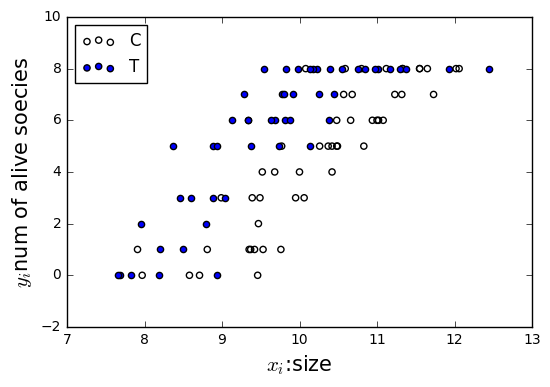

In [4]:
plt.scatter(data[data['f']=='C'].x,data[data['f']=='C'].y,facecolors='none',label='C')
plt.scatter(data[data['f']=='T'].x,data[data['f']=='T'].y,label='T')
plt.legend(loc='upper left')
plt.xlabel('$x_{i}$:size',fontsize=15)
plt.ylabel('$y_i$num of alive soecies',fontsize=15)
plt.show()

どうやら、以下のようである。
- 体サイズが大きくなると生存種子数が多くなるらしい
- 肥料をやると生存種子数が多くなるらしい。

## 6.3二項分布で表現する「あり・なし」カウントデータ
「N個のうちy個が生存していた」といった構造のカウントデータを統計モデルで表現するときには二項分布がよく使われます。

ちなみにポアソン分布では観測データを表現できません。なぜなら、ポアソン分は0以上だけど、「上限がどこにあるかわからないカウントデータ」を扱うからです。

二項分布の式は以下の通り。

$$p(y|N,q)={}_NC_yq^{y}(1-q)^{N-y}$$

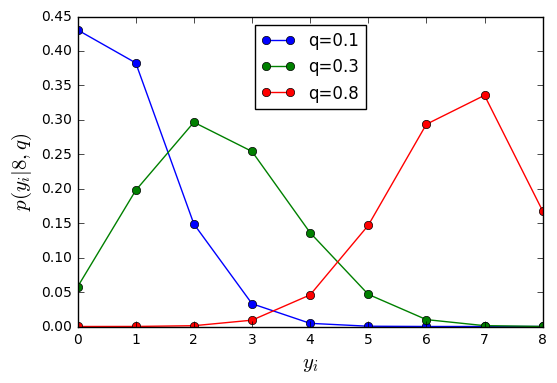

In [5]:
from scipy.stats import binom
x = np.arange(0,9)
plt.plot(x,binom.pmf(x,8.,0.1),'o-',label='q=0.1')
plt.plot(x,binom.pmf(x,8.,0.3),'o-',label='q=0.3')
plt.plot(x,binom.pmf(x,8.,0.8),'o-',label='q=0.8')
plt.legend(loc='upper center')
plt.xlabel('$y_i$',fontsize=15)
plt.ylabel('$p(y_{i}|8,q)$',fontsize=15)
plt.show()

## 6.4ロジスティック回帰とロジットリンク関数
### 6.4.1ロジットリンク関数

GLMは確率分布、リンク関数、線形予測子を指定する統計モデルであり、ロジスティック回帰では確率分布は二項分布、そしてリンク関数はロジットリンク関数を指定します。

二項分布では事象が生起する確率をパラメータとして指定する必要があり、この例題では種子の生存確率$q_{i}$がそれに該当する

この$q_{i}$は確率なので、0〜1です。ロジットリンク関数は、パラメータ$q_{i}$のこのような制約と、線形予測しをうまく関連付けるリンク関数です。

ロジスティック関数
$$q_{i}=logistic(z_{i}))/frac{1}{1+exp(-z})$$

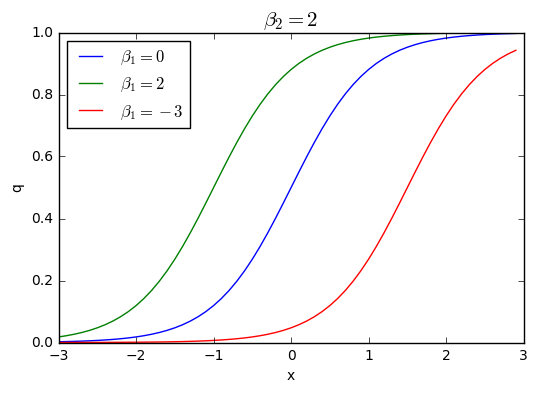

In [16]:
def logistic(beta1,beta2,x):
    return 1. / (1+np.exp(-(beta1+beta2*x)))

x = np.arange(-3,3,0.1)
plt.title('$\\beta_{2} =2$',fontsize=15)
plt.plot(x,logistic(0,2,x),label='$\\beta_{1} =0$')
plt.plot(x,logistic(2,2,x),label='$\\beta_{1} =2$')
plt.plot(x,logistic(-3,2,x),label='$\\beta_{1} =-3$')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('q')
plt.show()

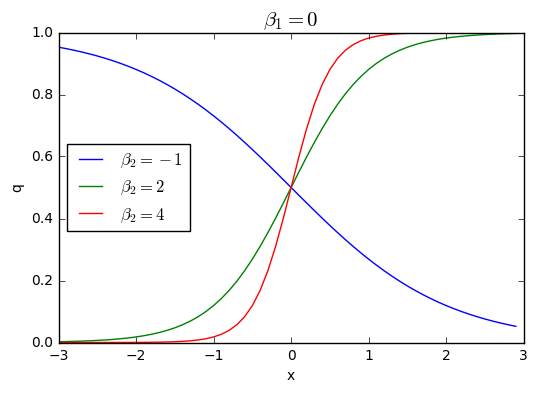

In [7]:
plt.title('$\\beta_{1} =0$',fontsize=15)
plt.plot(x,logistic(0,-1,x),label='$\\beta_{2} =-1$')
plt.plot(x,logistic(0,2,x),label='$\\beta_{2} =2$')
plt.plot(x,logistic(0,4,x),label='$\\beta_{2} =4$')
plt.legend(loc='center left')
plt.xlabel('x')
plt.ylabel('q')
plt.show()

ロジスティック関数を変形すると
$$log\frac{q_{i}}{1-q_{i}}=z_{i}$$

この左辺のことをロジット関数と言います。
$$logit(q_{i}) = log\frac{q_{i}}{1-q_{i}}$$

ロジット関数はロジスティック関数の逆関数であり、ロジスティック関数の逆がロジット関数である。

### 6.4.2パラメータ推定

In [8]:
data['f_int'] = (data['f'] == 'T').astype(int)
data.x_c = sm.add_constant(data[['x','f_int']])
data['N-y']=data['N']-data['y']
result = sm.GLM(data[['y','N-y']],data.x_c,family=sm.families.Binomial()).fit()#binominalを分布に使う場合は、非説明変数は[成功数,失敗数]とすること。
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y', 'N-y']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Fri, 27 Jan 2017   Deviance:                       123.03
Time:                        10:53:25   Pearson chi2:                     109.
No. Iterations:                     8                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -19.5361      1.414    -13.818      0.000       -22.307   -16.765
x              1.9524      0.139     14.059      0.000         1.680     2.225
f_int          2.0215      0.231      8.740      0.000         1.568     2.475
==============================================================================
"""

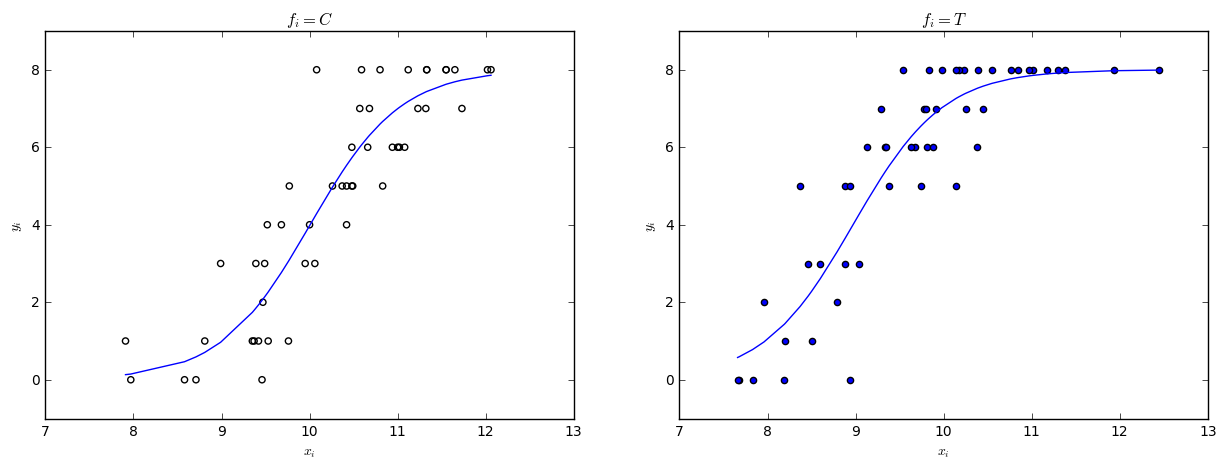

In [9]:
def logistic(x):
    return 1. / (1+np.exp(-x))

data['predict'] = result.predict()#返ってくるのは規格化された値
fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(data[data['f']=='C'].x,data[data['f']=='C'].y,facecolors='none')
ax1.plot(data[data['f']=='C'].sort_values('x').x,data[data['f']=='C'].sort_values('x').predict*8.)
ax2.scatter(data[data['f']=='T'].x,data[data['f']=='T'].y)
ax2.plot(data[data['f']=='T'].sort_values('x').x,data[data['f']=='T'].sort_values('x').predict*8.)
ax1.set(xlabel='$x_{i}$',ylabel='$y_{i}$',title='$f_{i}=C$')
ax2.set(xlabel='$x_{i}$',ylabel='$y_{i}$',title='$f_{i}=T$')
plt.show()

In [10]:
import itertools
column = ['f_int','x']
sumarry = []
for i in range(2):
    for a in itertools.combinations(column,i+1):
        a_array = np.array(a)
        data.x_c = sm.add_constant(data[a_array])
        model = sm.GLM(data[['y','N-y']],data.x_c,family=sm.families.Binomial())
        res = model.fit()
        sumarry.append([a_array,res.df_model+1,res.llf,-2*res.llf,res.deviance,res.aic])
result_table = pd.DataFrame(sumarry,columns=['model','k','logL','deviance','residual deviance','AIC'])


In [11]:
result_table

,model,k,logL,deviance,residual deviance,AIC
0,[f_int],2,-316.879877,633.759753,490.582514,637.759753
1,[x],2,-180.172722,360.345443,217.168204,364.345443
2,"[f_int, x]",3,-133.105565,266.211129,123.033890,272.211129


In [12]:
data['x*f'] = data['x'] * data['f_int']

In [13]:
data.x_c = sm.add_constant(data[['x','f_int','x*f']])
result = sm.GLM(data[['y','N-y']],data.x_c,family=sm.families.Binomial()).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y', 'N-y']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Fri, 27 Jan 2017   Deviance:                       122.43
Time:                        10:53:25   Pearson chi2:                     109.
No. Iterations:                     8                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -18.5233      1.886     -9.821      0.000       -22.220   -14.827
x              1.8525      0.186      9.983      0.000         1.489     2.216
f_int         -0.0638      2.704     -0.024      0.981        -5.363     5.235
x*f            0.2163      0.280      0.772      0.440        -0.333     0.765
==============================================================================
"""

In [14]:
result.aic

273.61059672597395

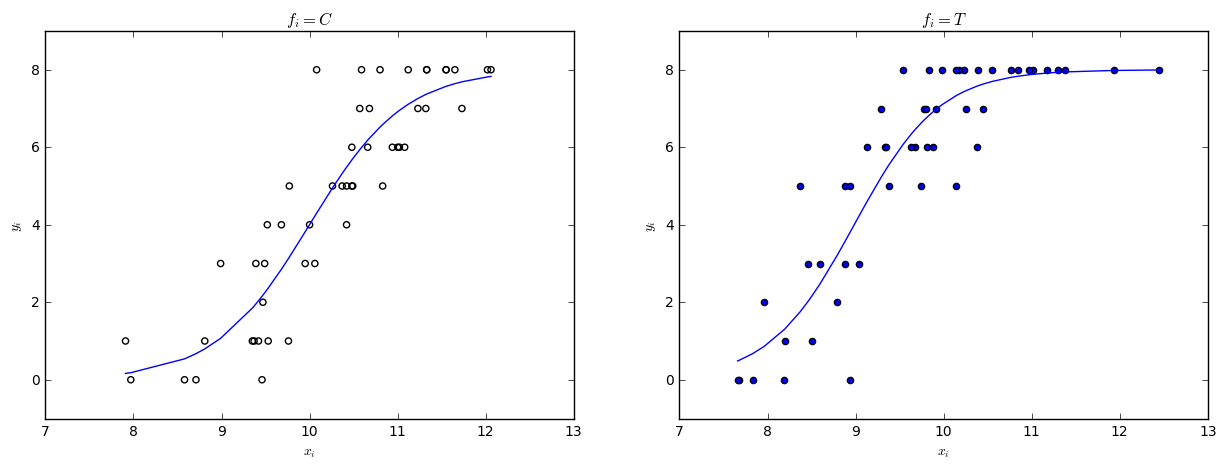

In [15]:
def logistic(x):
    return 1. / (1+np.exp(-x))

data['predict'] = result.predict()#返ってくるのは規格化された値
fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(data[data['f']=='C'].x,data[data['f']=='C'].y,facecolors='none')
ax1.plot(data[data['f']=='C'].sort_values('x').x,data[data['f']=='C'].sort_values('x').predict*8.)
ax2.scatter(data[data['f']=='T'].x,data[data['f']=='T'].y)
ax2.plot(data[data['f']=='T'].sort_values('x').x,data[data['f']=='T'].sort_values('x').predict*8.)
ax1.set(xlabel='$x_{i}$',ylabel='$y_{i}$',title='$f_{i}=C$')
ax2.set(xlabel='$x_{i}$',ylabel='$y_{i}$',title='$f_{i}=T$')
plt.show()